In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('development_dataset.csv')
test_lb = pd.read_csv('leaderboard_dataset.csv')
test_ev = pd.read_csv('Evaluation_dataset.csv')

In [3]:
total = pd.concat([train,test_lb,test_ev],sort = False,axis=0)

In [5]:
total.shape

(54000, 21)

In [6]:
total.isnull().sum().sort_values()

VAR1         0
VAR19        0
VAR18        0
VAR20        0
VAR14        0
VAR5         1
VAR7      1294
VAR8      1294
VAR16     1346
VAR2      1478
VAR3      5298
VAR6      5565
VAR10     7269
VAR11    12012
VAR15    12724
VAR13    13509
VAR12    16813
VAR4     19783
VAR21    20000
VAR9     25172
VAR17    35260
dtype: int64

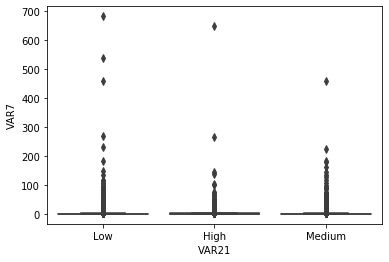

In [161]:
sns.boxplot(x='VAR21',y='VAR7',data=train)
# total['VAR7'].value_counts()

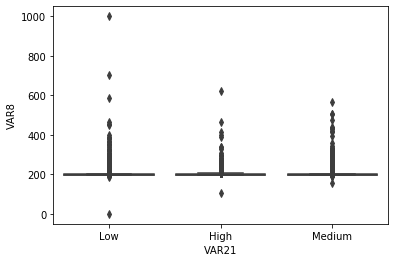

In [162]:
sns.boxplot(x='VAR21',y='VAR8',data=train)

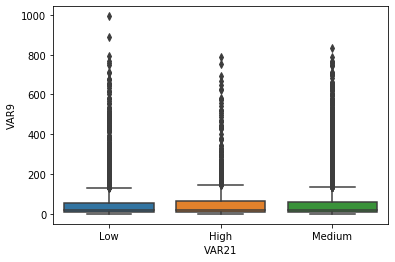

In [53]:
sns.boxplot(x='VAR21',y='VAR9',data=train)

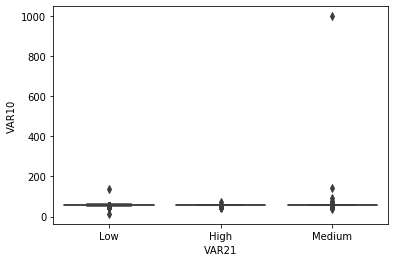

In [54]:
sns.boxplot(x='VAR21',y='VAR10',data=train)

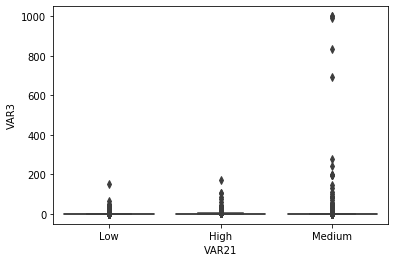

In [56]:
sns.boxplot(x='VAR21',y='VAR3',data=train)

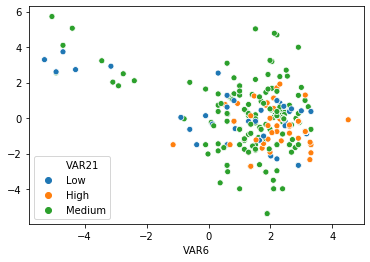

In [185]:
sns.scatterplot(x=np.log(train['VAR6']),y=np.log((-train['VAR6']+train['VAR3'])/train['VAR6']),hue=train['VAR21'])
# sns.scatterplot(x=np.log(train['VAR6']),y=np.log(train['VAR3']),hue=train['VAR21'])

In [5]:
total['VAR3']=total['VAR3'].fillna(np.nanmedian(total['VAR3']))
total['VAR6']=total['VAR6'].fillna(np.nanmedian(total['VAR6']))

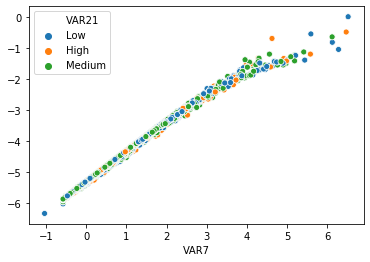

In [79]:
sns.scatterplot(x=np.log(train['VAR7']),y=np.log(train['VAR7']/(train['VAR8']+train['VAR7'])),hue=train['VAR21'])

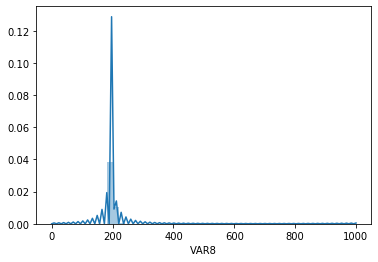

In [103]:
sns.distplot(train['VAR8'][~train['VAR8'].isna()])

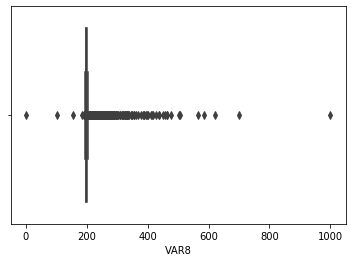

In [104]:
sns.boxplot(train['VAR8'])

In [23]:
total['VAR7'] = total['VAR7'].fillna(np.nanmedian(train['VAR7']))
total['VAR8'] = total['VAR8'].fillna(np.nanmedian(train['VAR8']))

In [24]:
total['VAR22']=total['VAR3']-total['VAR6']
total['VAR23']=total['VAR7']+total['VAR8']
total['VAR24']=total['VAR7']/total['VAR23']
total['VAR25']=total['VAR22']/total['VAR6']

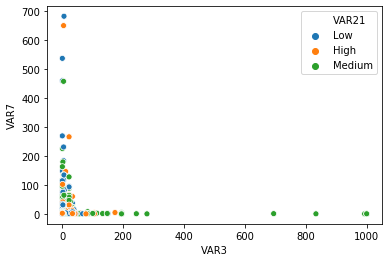

In [74]:
sns.scatterplot(x=train['VAR3'],y=train['VAR7'],hue=train['VAR21'])

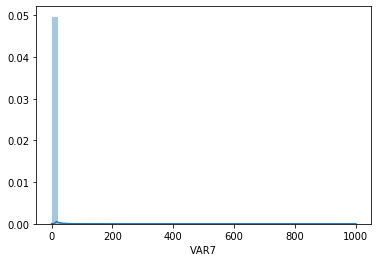

In [72]:
# total['VAR2'].fillna(np.nanmedian(total['VAR2']),inplace=True)
sns.distplot(total['VAR7'][~total['VAR7'].isna()])

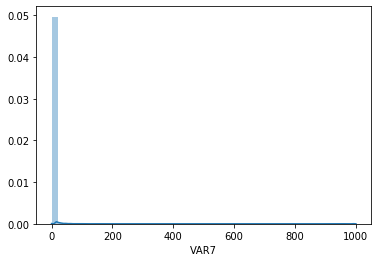

In [73]:
sns.distplot(total1['VAR7'])

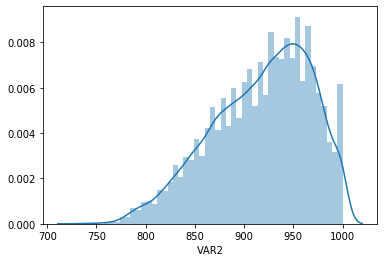

In [36]:
sns.distplot(train['VAR2'][~train['VAR2'].isna()])

In [10]:
total['VAR14'].value_counts()

1      33147
2      12658
3       4398
4       1423
0       1166
5        442
.        419
6        190
7         47
8         46
10        22
12        12
9         11
15         3
14         3
18         3
20         3
23         2
11         2
22         1
104        1
24         1
Name: VAR14, dtype: int64

In [11]:
total['VAR21'].value_counts()

Medium    18172
Low       12081
High       3747
Name: VAR21, dtype: int64

In [4]:
total = total.replace({'.':0})

In [5]:
total['VAR21']=total['VAR21'].replace({'High':2,'Medium':1,'Low':0})

In [6]:
total['VAR14'] = total['VAR14'].astype('int64')
# total['VAR21'] = total['VAR21'].astype('int64')

In [7]:
total1=total.drop(['VAR1','VAR21'],axis=1)
to_col1=total1.columns
tocol1_null=total1.columns[total1.isnull().any()]

In [12]:
import xgboost as xgb
# clf=xgb.XGBRegressor(max_depth=10,learning_rate=0.02,n_estimators=300,n_jobs=4,nthread=4)
clf=xgb.XGBRegressor(n_jobs=4,nthread=4)
for i in tocol1_null:
    trainx=total1[~total1[i].isnull()]
    trainx=trainx.drop([i],axis=1)
    trainy=total1[i][~total1[i].isnull()]
    clf.fit(trainx,trainy)
    testx=total1[total1[i].isnull()]
    testx=testx.drop([i],axis=1)
    total1[i][total1[i].isnull()]=clf.predict(testx)
    

[17:29:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:29:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [177]:
# total1['VAR22']=total1['VAR3']-total1['VAR6']
# total1['VAR23']=total1['VAR7']+total1['VAR8']
# total1['VAR24']=total1['VAR7']/total1['VAR23']
# total1['VAR25']=total1['VAR22']/total1['VAR6']
# to_col1=total1.columns

In [8]:
l1=train.shape[0]
l2=test_lb.shape[0]
train1=total1.iloc[:l1,:]
test_lb1=total1.iloc[l1:l1+l2,:]
test_ev1=total1.iloc[l1+l2:,:]
target = total['VAR21'].iloc[:l1]

In [283]:
target.value_counts()

Medium    18172
Low       12081
High       3747
Name: VAR21, dtype: int64

In [9]:
import xgboost as XGB
xgb = XGB.XGBClassifier(n_jobs=4,nthread=-1)
xgb.fit(train1,target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=4,
              nthread=-1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [10]:
y_pred = xgb.predict(test_lb1)
ypred = pd.DataFrame(y_pred)

In [32]:
df = pd.concat([test_lb['VAR1'],ypred[0]],axis = 1)

In [33]:
df[0] = df[0].replace({0:'Low',1:'Medium',2:'High'})

In [34]:
df[0].value_counts()

Medium    7984
Low       1948
High        68
Name: 0, dtype: int64

In [35]:
df.to_csv('Prolytix_IITRoorkee_20.csv',index=False,header=False)

In [66]:
xgb.feature_importances_

array([0.08374431, 0.10783777, 0.10830672, 0.02602899, 0.0656094 ,
       0.04476422, 0.02133043, 0.02148134, 0.02202487, 0.02099533,
       0.03949979, 0.0282407 , 0.03242259, 0.0484259 , 0.04352403,
       0.02789544, 0.0247013 , 0.03726633, 0.08366393, 0.03201313,
       0.03087867, 0.0347291 , 0.01461562], dtype=float32)

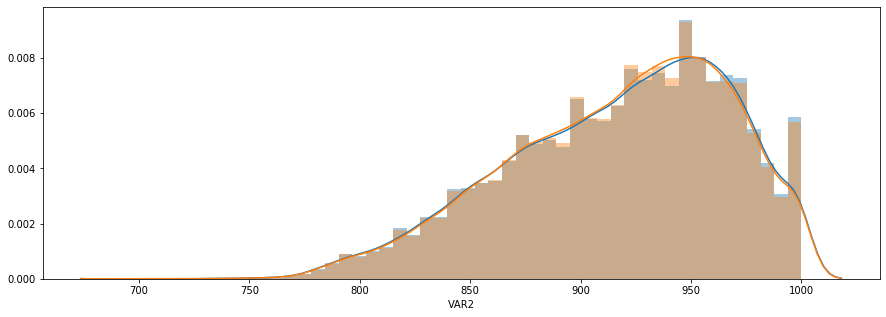

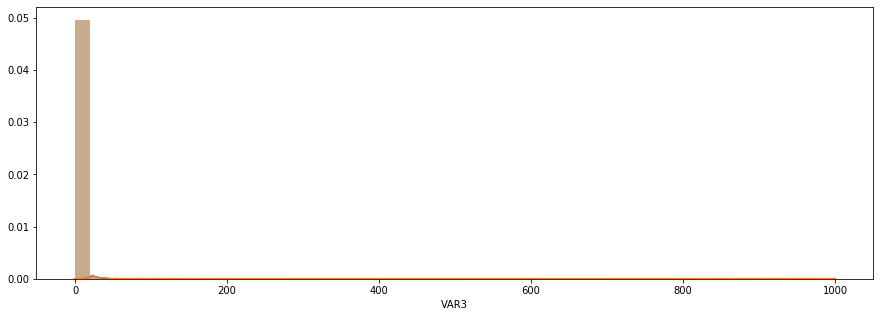

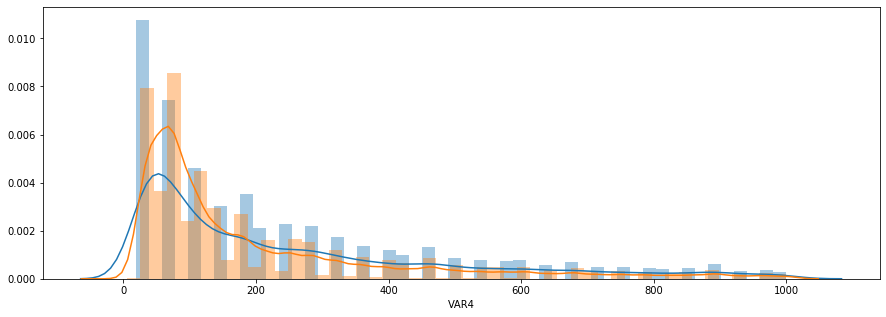

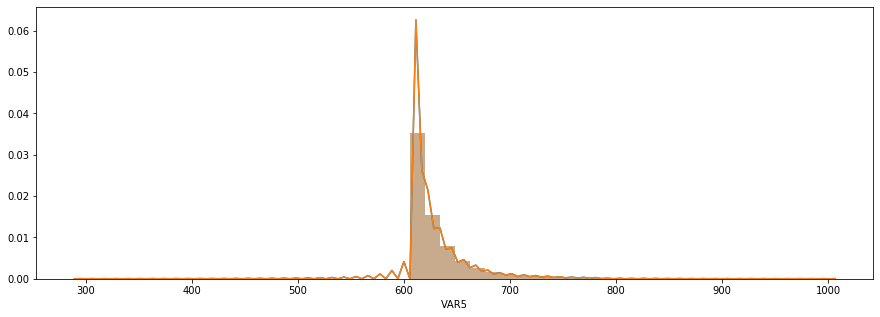

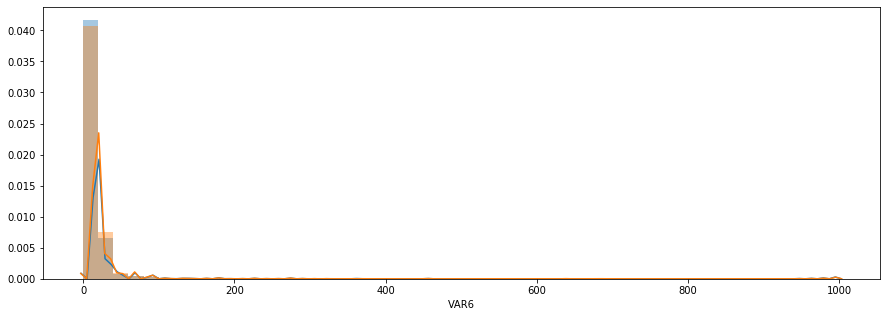

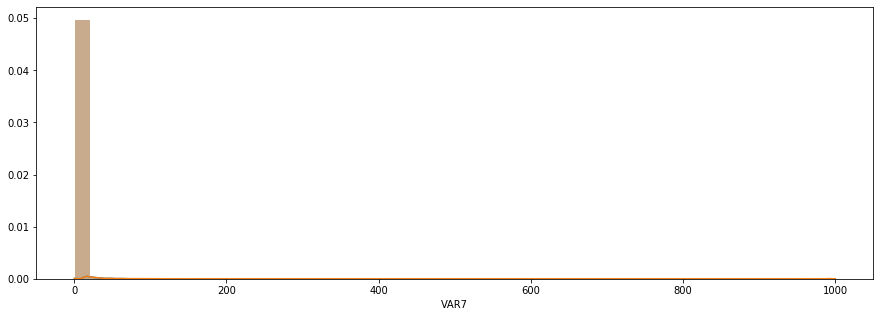

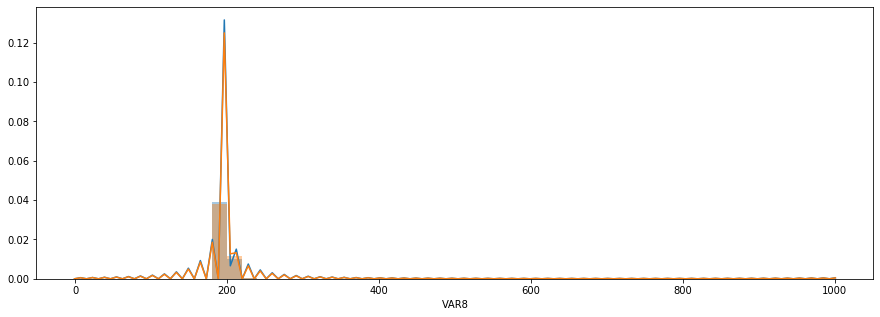

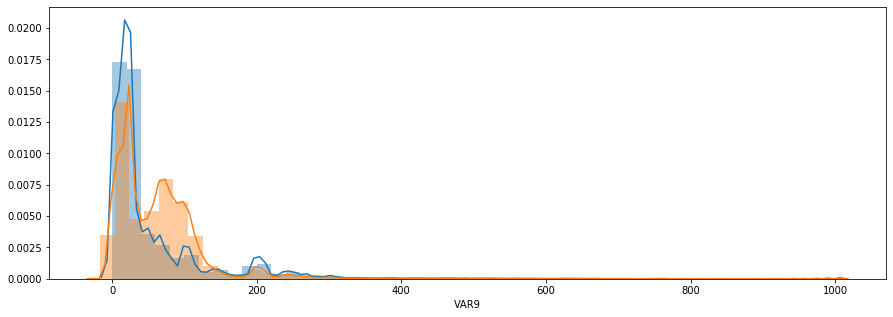

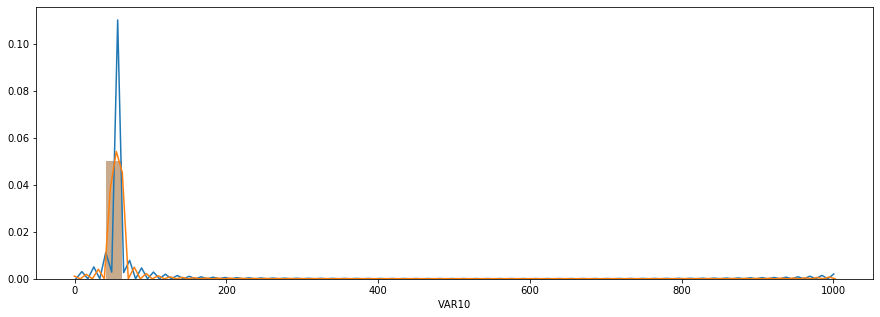

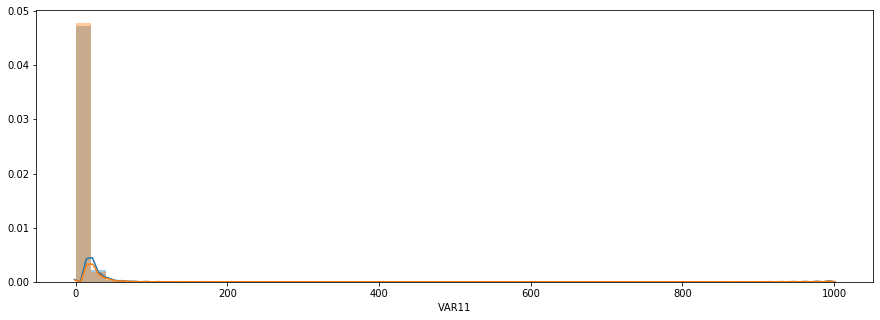

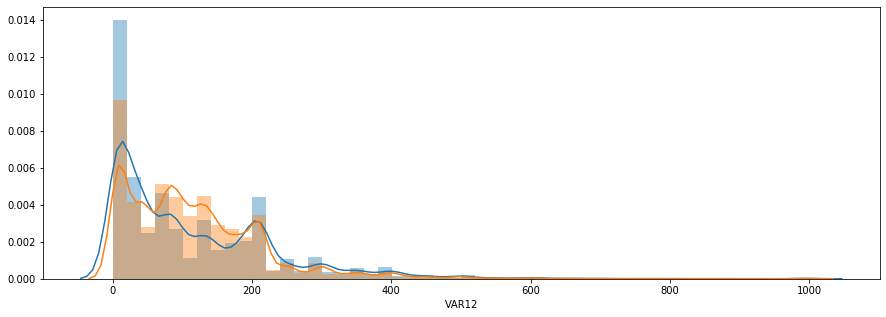

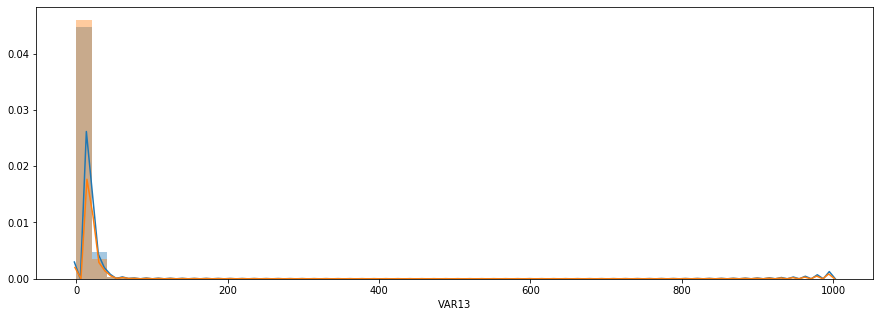

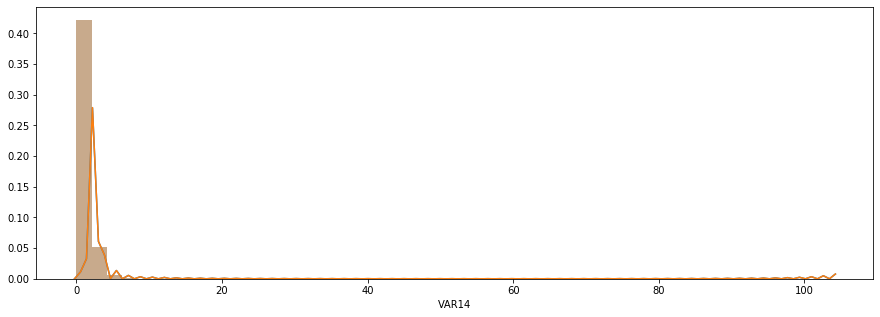

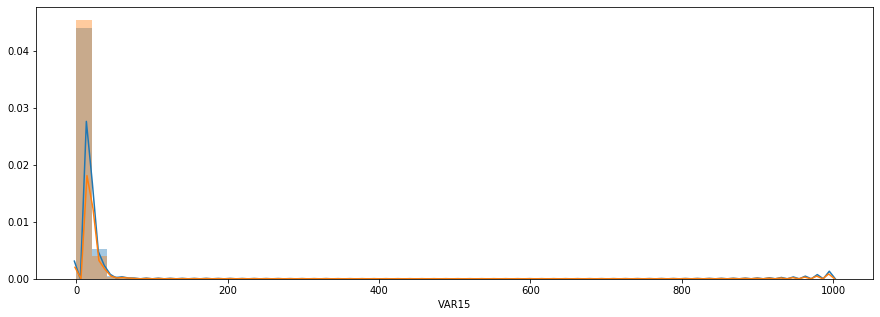

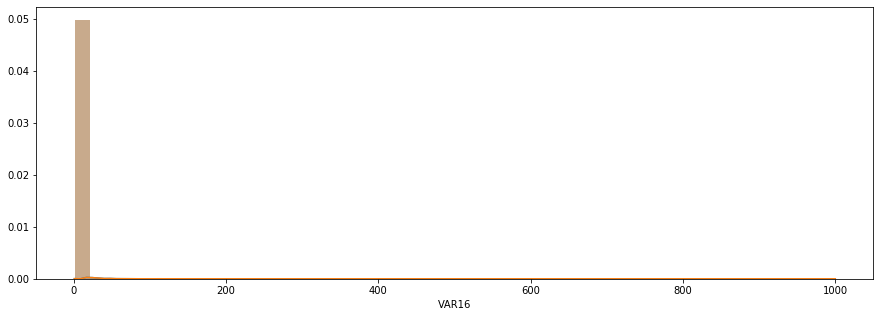

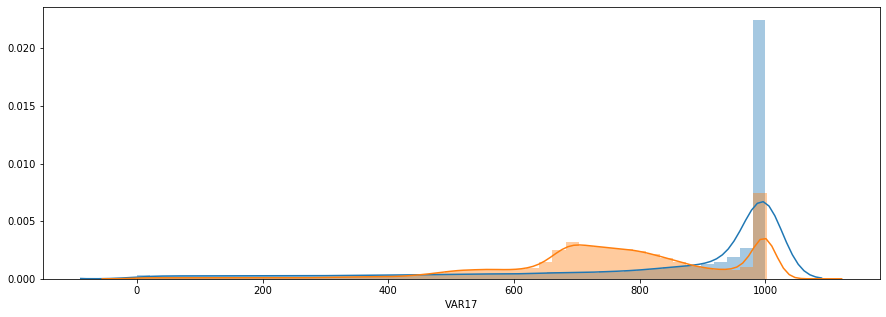

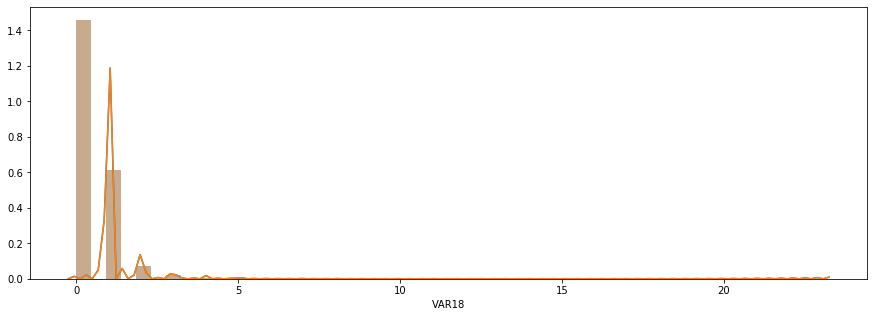

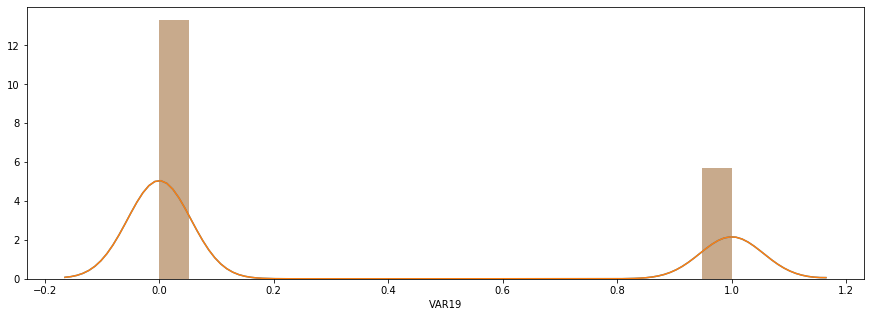

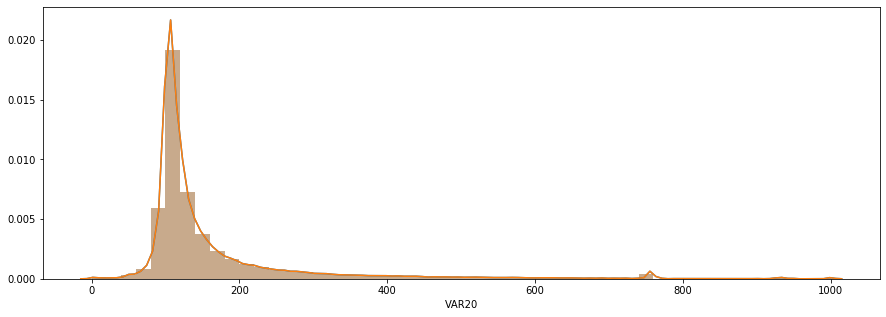

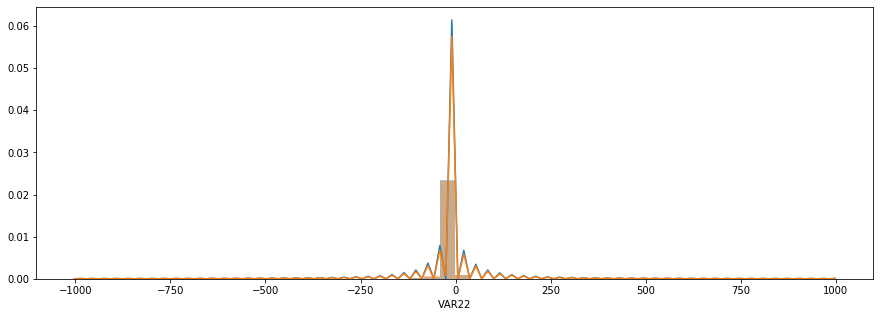

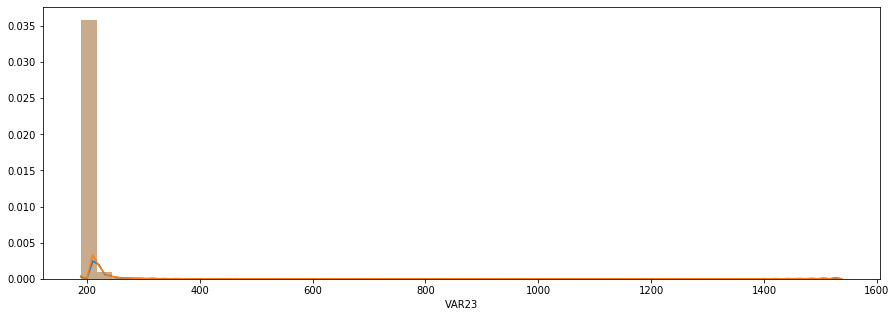

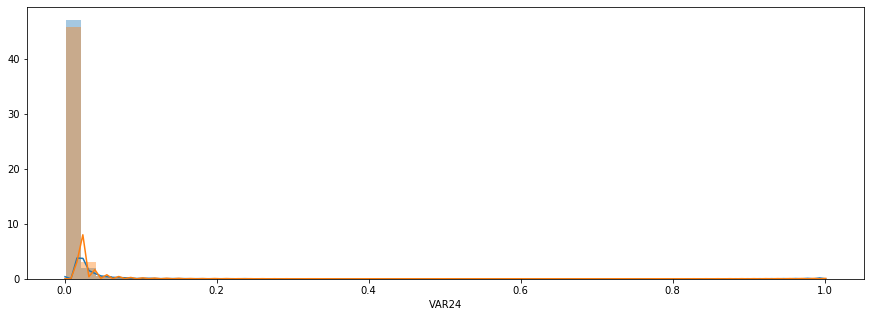

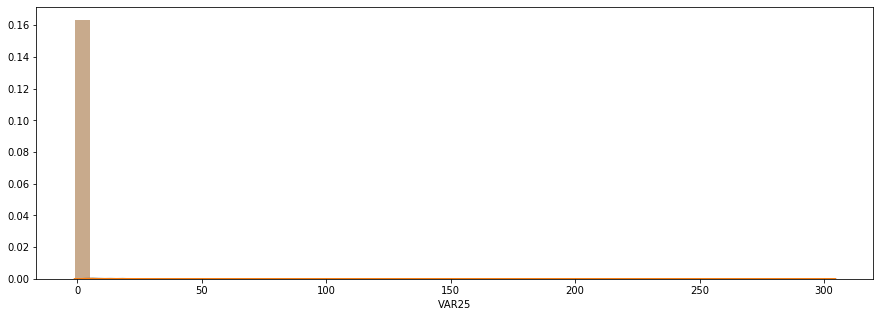

In [178]:
for i in to_col1:
    plt.figure(figsize=(15,5))
    sns.distplot(total[i][~total[i].isna()])
#     plt.show()
#     plt.figure(figsize=(20,10))
    sns.distplot(total1[i])
    plt.show()

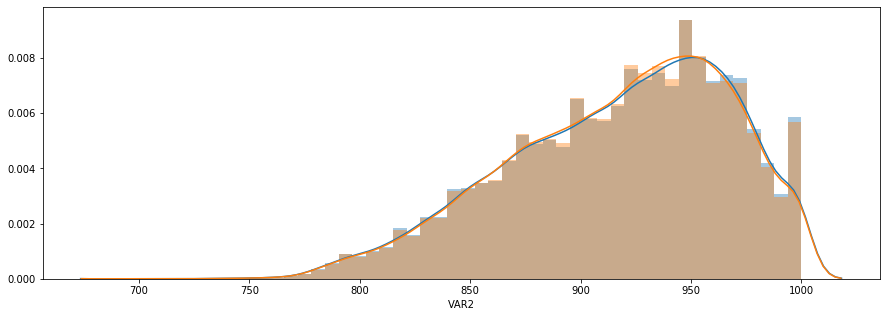

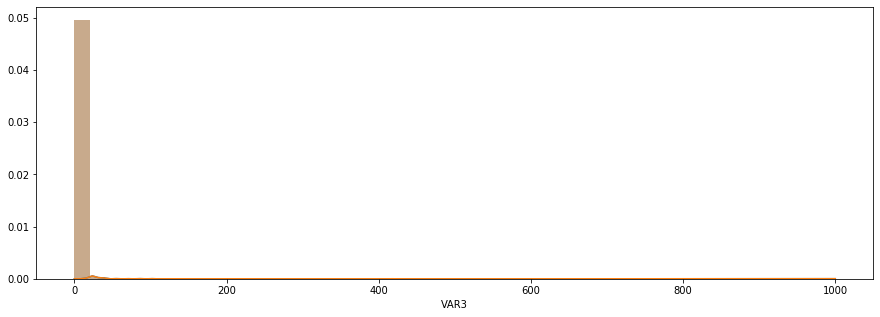

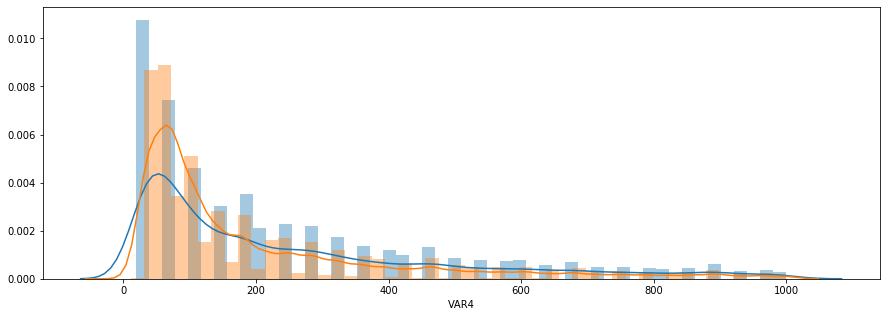

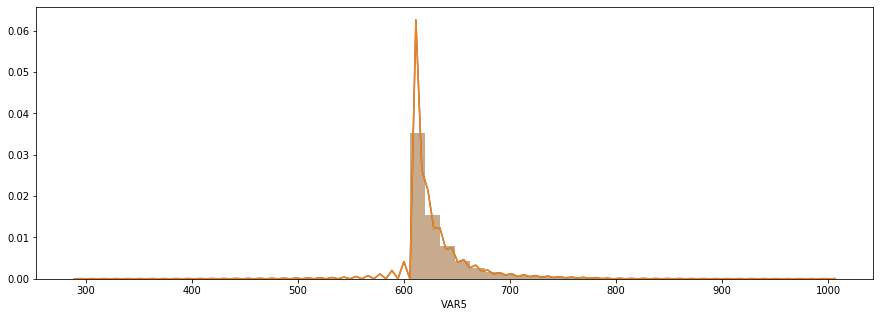

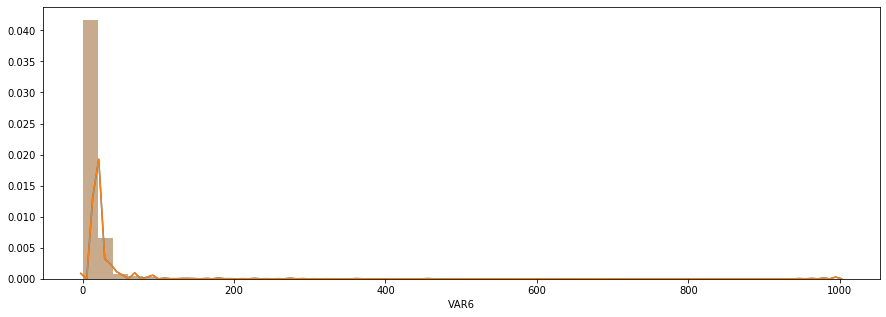

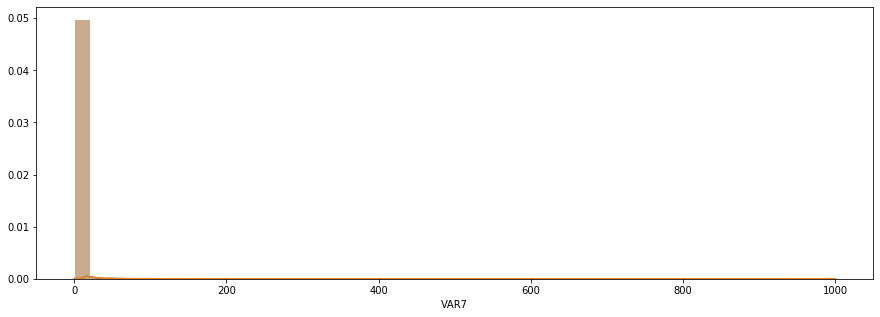

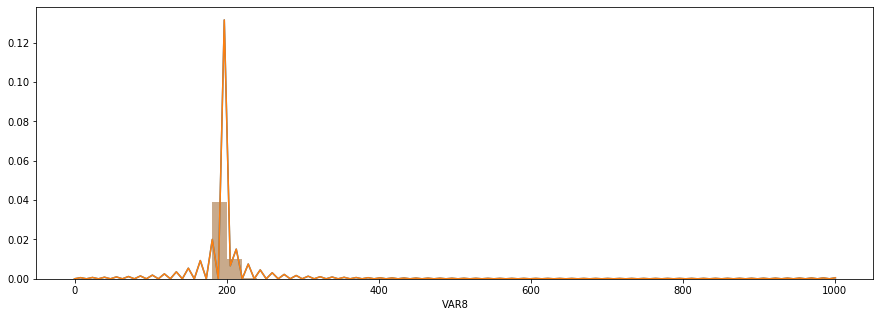

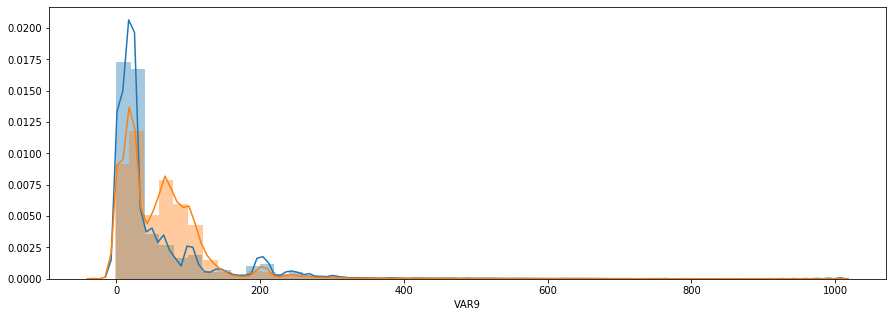

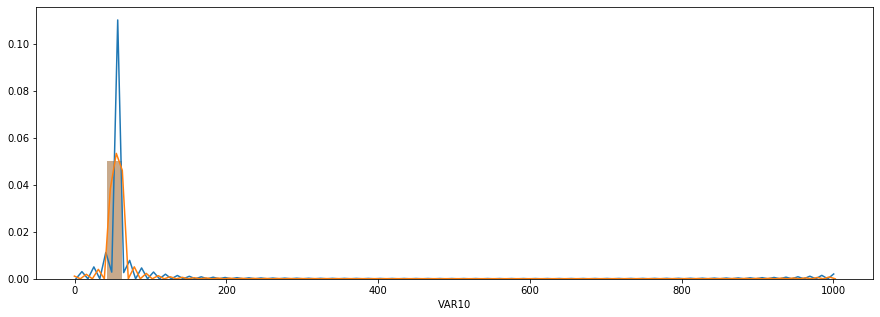

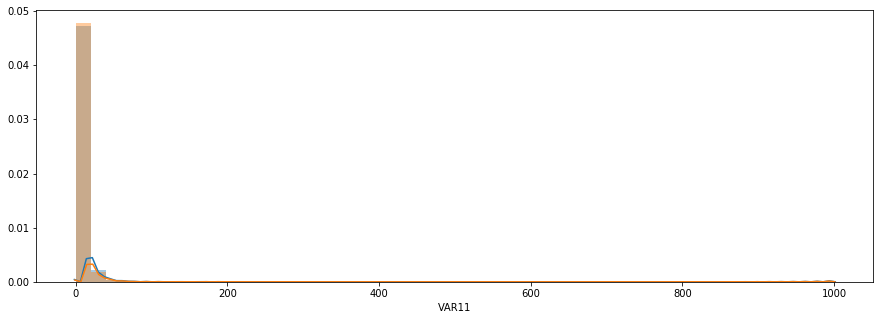

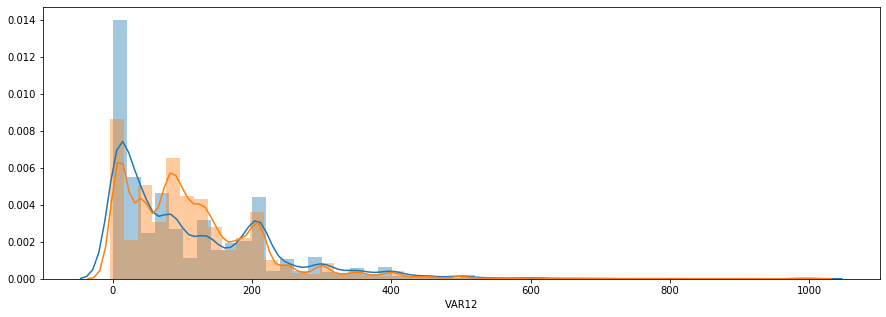

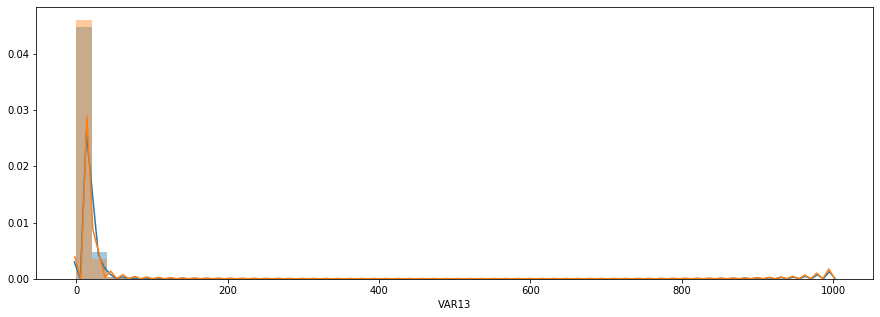

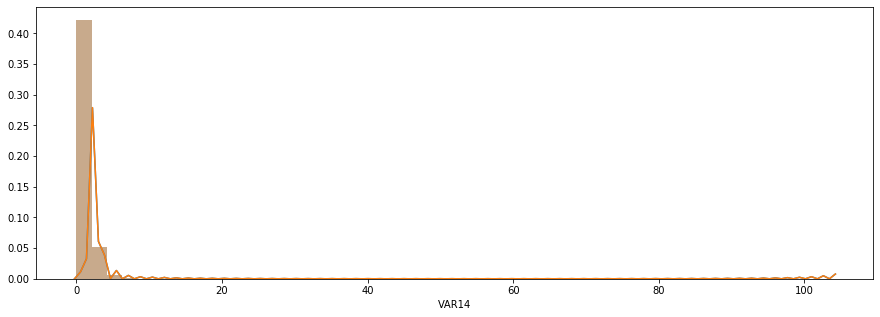

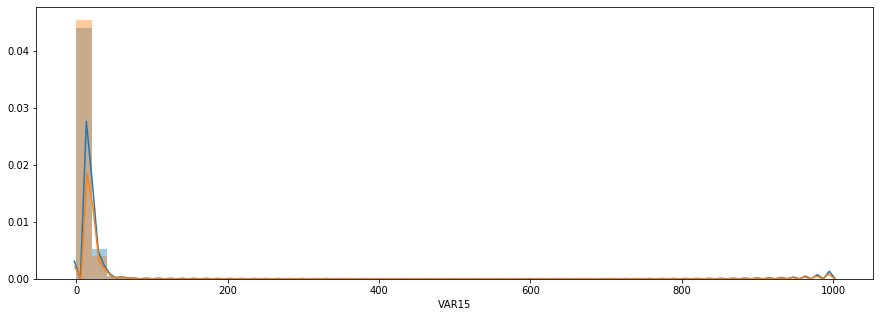

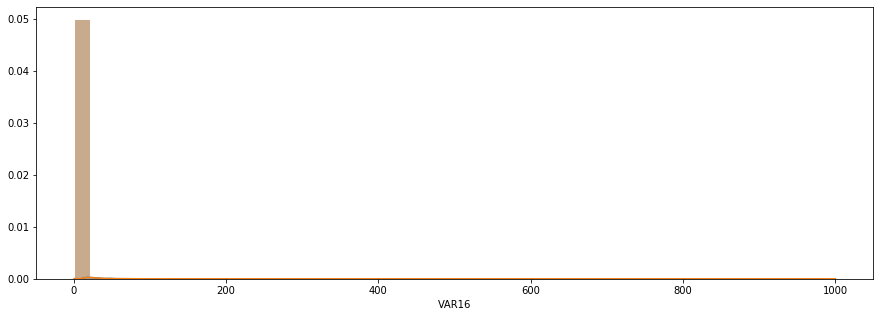

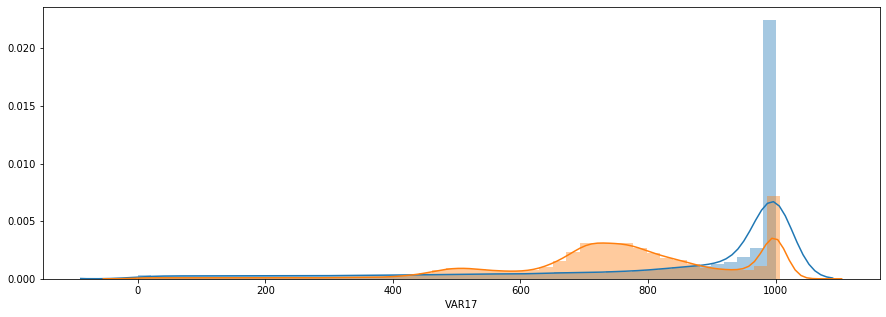

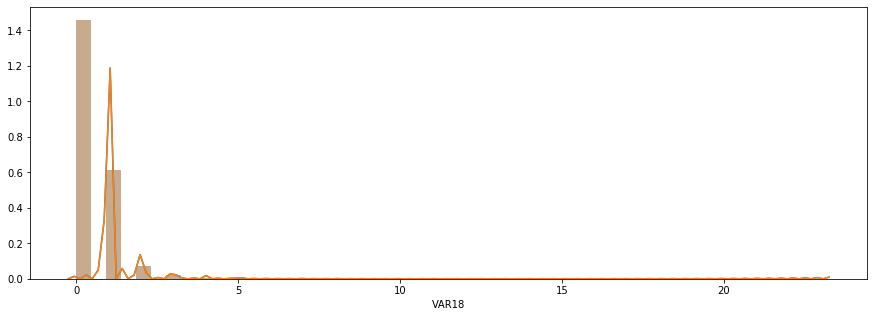

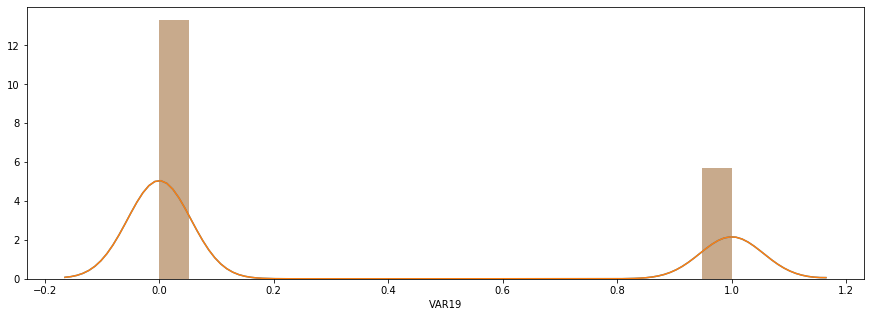

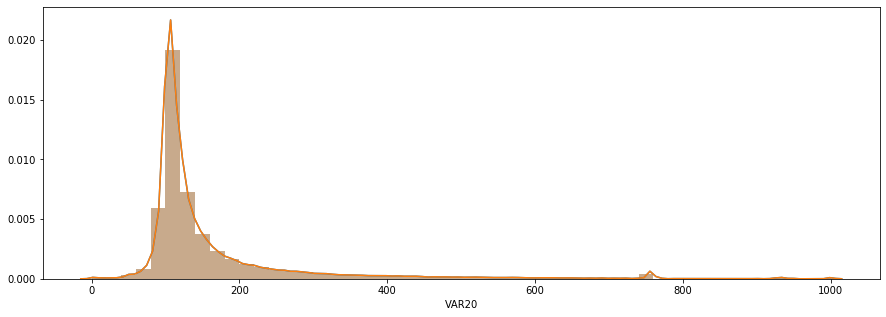

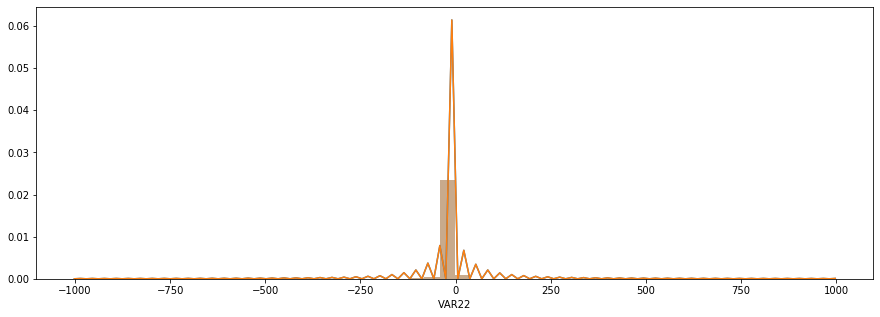

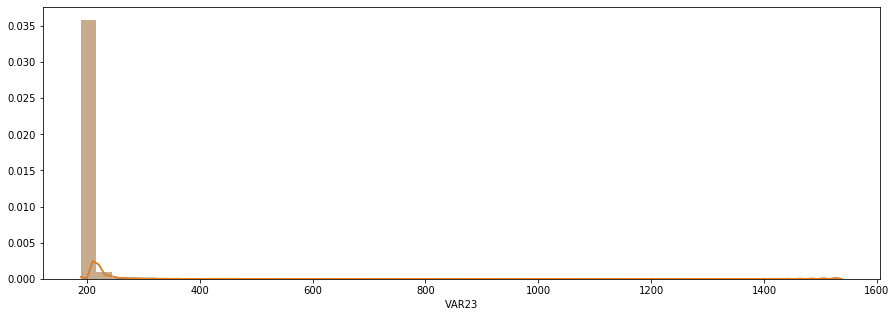

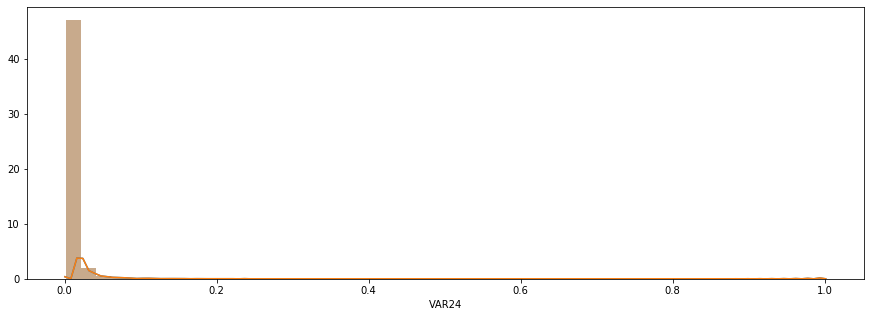

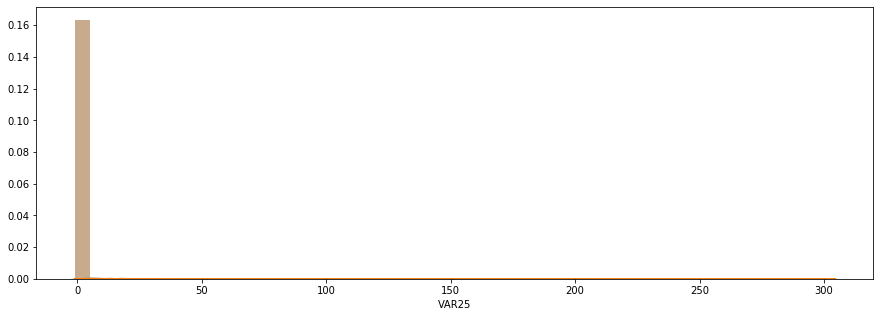

In [181]:
for i in to_col1:
    plt.figure(figsize=(15,5))
    sns.distplot(total[i][~total[i].isna()])
#     plt.show()
#     plt.figure(figsize=(20,10))
    sns.distplot(total1[i])
    plt.show()

In [ ]:
metric_score(y_pred)

In [ ]:
def metric_score(pred):
    